In [1]:
import pandas as pd
import numpy as np

In [2]:
#checking data
data_test = pd.read_csv('hotels_test.csv')
data_test.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520


In [3]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [4]:
#checking data, training part
data_train = pd.read_csv('hotels_train.csv')
data_train.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

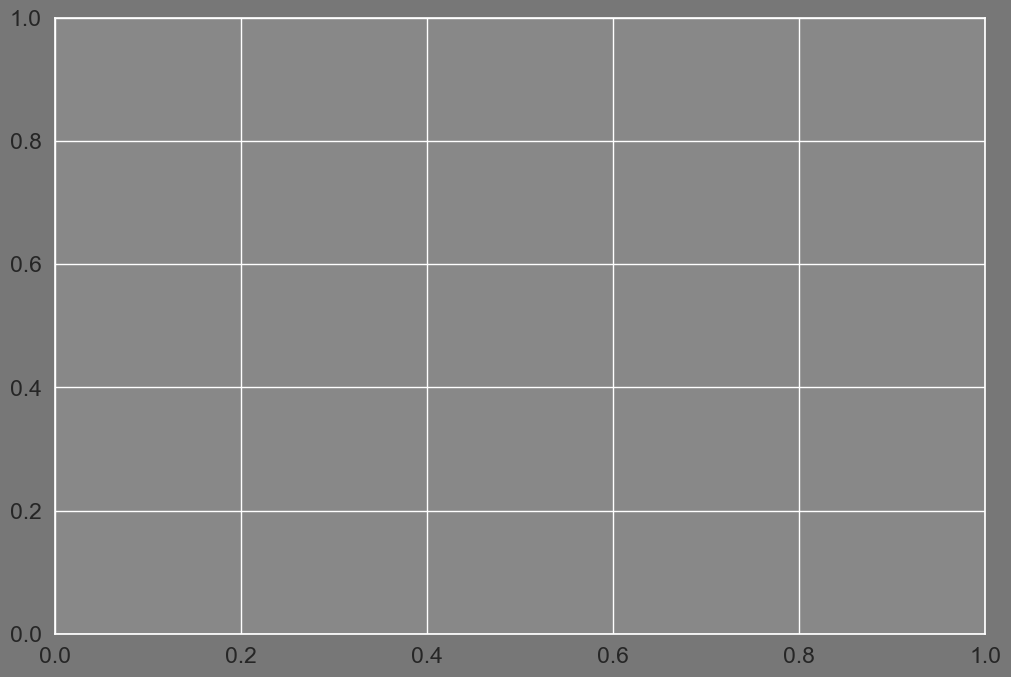

In [7]:
#additional setup for dark themes, optional
sns.set(font_scale=1.5, rc={'axes.facecolor':'#888888', 'figure.facecolor':'#777777', 'figure.figsize':(12,8)})    
fig, ax = plt.subplots(figsize=(12, 8))

In [ ]:
#importing library for better understanding of a dataset
from ydata_profiling import ProfileReport

In [8]:
#importing machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [9]:
#seed for reproducibility
RANDOM_SEED = 42

In [10]:
# Uniting test and train datasets into one for uniform processing of features
data_train['sample'] = 1 # marking train set
data_test['sample'] = 0 # marking test set
data_test['reviewer_score'] = 0 # test set lacks "reviewer_score", we must predict it, so just filling with zeroes for now

data = pd.concat([data_train, data_test], ignore_index=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [ ]:
profile = ProfileReport(data, title="Profiling_Report")


In [ ]:
#saving visual data description into a html to browse and assess
profile.to_file("your_report.html")

In [11]:
#filling in geo data. Not the best solution, but to get numbers for model training
lati_mode = data['lat'].mode().iloc[0]
longi_mode = data['lng'].mode().iloc[0]
data['lat'] = data['lat'].fillna(lati_mode)
data['lng'] = data['lng'].fillna(longi_mode)
data['lat'] = round(data['lat'])
data['lng'] = round(data['lng'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [12]:
# checking variety of properties
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
reviewer_score                                    38
tags                                           55242
days_since_review                                731
lat                                                7
lng                                                5
sample                                             2
dtype: int64

In [13]:
#reducing number of nationalities
nationality_top = data.reviewer_nationality.value_counts().head(27).index.tolist()
print(nationality_top)

[' United Kingdom ', ' United States of America ', ' Australia ', ' Ireland ', ' United Arab Emirates ', ' Saudi Arabia ', ' Netherlands ', ' Switzerland ', ' Germany ', ' Canada ', ' France ', ' Israel ', ' Italy ', ' Belgium ', ' Turkey ', ' Kuwait ', ' Spain ', ' Romania ', ' Russia ', ' South Africa ', ' India ', ' Greece ', ' China ', ' Sweden ', ' New Zealand ', ' Singapore ', ' Hong Kong ']


In [14]:
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x if x in nationality_top else 'other')
data['reviewer_nationality'].value_counts()

reviewer_nationality
 United Kingdom               245246
other                          69694
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
 France                         7296
 Israel                         6610
 Italy                          6114
 Belgium                        6031
 Turkey                         5444
 Kuwait                         4920
 Spain                          4737
 Romania                        4552
 Russia                         3900
 South Africa                   3821
 India                          3437
 Greece                         3406
 China                          3400
 Sweden                         3368
 New Zealand                    3237
 Singapore       

In [15]:
import category_encoders as ce

In [16]:
#encoding nationalities in binaries, because we can
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) 
type_bin = bin_encoder.fit_transform(data['reviewer_nationality'])
data = pd.concat([data, type_bin], axis=1)

In [17]:
#date to datetime
data['review_date'] = pd.to_datetime(data['review_date'])
data['review_date'].describe()

count                           515738
mean     2016-08-13 13:23:37.096277760
min                2015-08-04 00:00:00
25%                2016-02-23 00:00:00
50%                2016-08-15 00:00:00
75%                2017-02-09 00:00:00
max                2017-08-03 00:00:00
Name: review_date, dtype: object

In [18]:
#maybe there is value in knowing a season of a score
def get_season(month):
    if month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    elif month in [9, 10, 11]:  # Autumn/Fall: September, October, November
        return 'Autumn'
    else:  # Winter: December, January, February
        return 'Winter'
data['review_season'] = data['review_date'].dt.month.apply(get_season)
data['review_season'].value_counts()

review_season
Summer    142886
Spring    130483
Autumn    122241
Winter    120128
Name: count, dtype: int64

In [19]:
# encoding seasons into 4 additional columns
encoder = ce.OneHotEncoder(cols=['review_season'], use_cat_names=True) # указываем столбец для кодирования
season_bin = encoder.fit_transform(data['review_season'])
data = pd.concat([data, season_bin], axis=1)

In [20]:
#extracting actual figure from string 'days' column
import re
def extract_days(cell):
    # match numbers
    pattern = r'\d+'
    number_days = re.findall(pattern, cell)[0]
    return int(number_days)

data['days_since_review'] = data['days_since_review'].apply(extract_days)

In [21]:
# categorizing tags by their quantity per estimate
import ast
data['tags'] = data['tags'].apply(ast.literal_eval)
data['tags'] = data['tags'].apply(tuple)
data['number_of_tags'] = data['tags'].apply(len)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [24]:
#removing object columns
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [25]:
#and datetime
data.drop('review_date', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   reviewer_score                              515738 non-null  float64
 7   days_since_review                           515738 non-null  int64  
 8   lat                                         515738 non-null  float64
 9   lng                                         515738 non-null  float64
 

<Axes: >

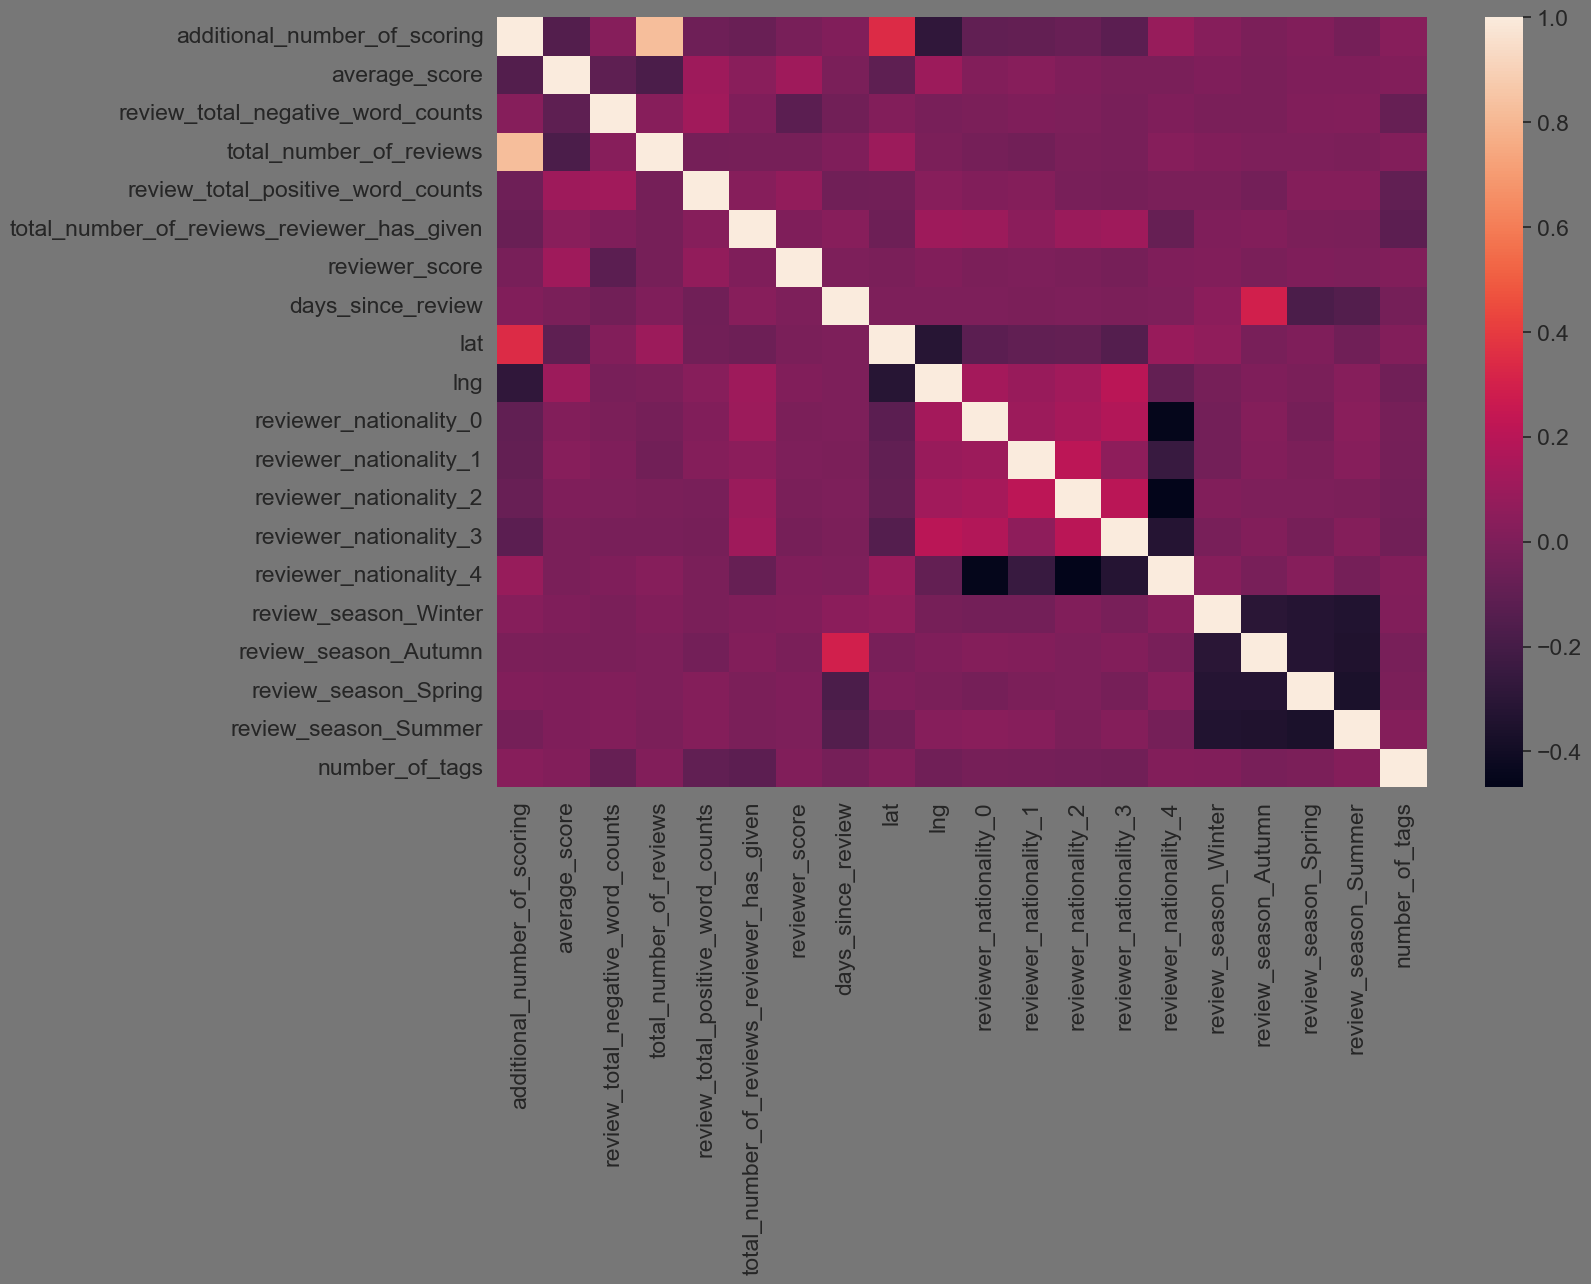

In [26]:
#some visuals
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=False)

In [27]:
#dividing processed dataset back into train/test
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # target
X = train_data.drop(['reviewer_score'], axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#shape check
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 20), (386803, 20), (386803, 19), (309442, 19), (77361, 19))

In [30]:
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [31]:
%%time
# Training model
model.fit(X_train, y_train)
# Predicting test sample with the trained model
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


CPU times: total: 4min 57s
Wall time: 26.5 s


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


In [32]:
#checking MAE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.9476633258052382


In [33]:
#checking MAPE
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1367273228105063


<Axes: >

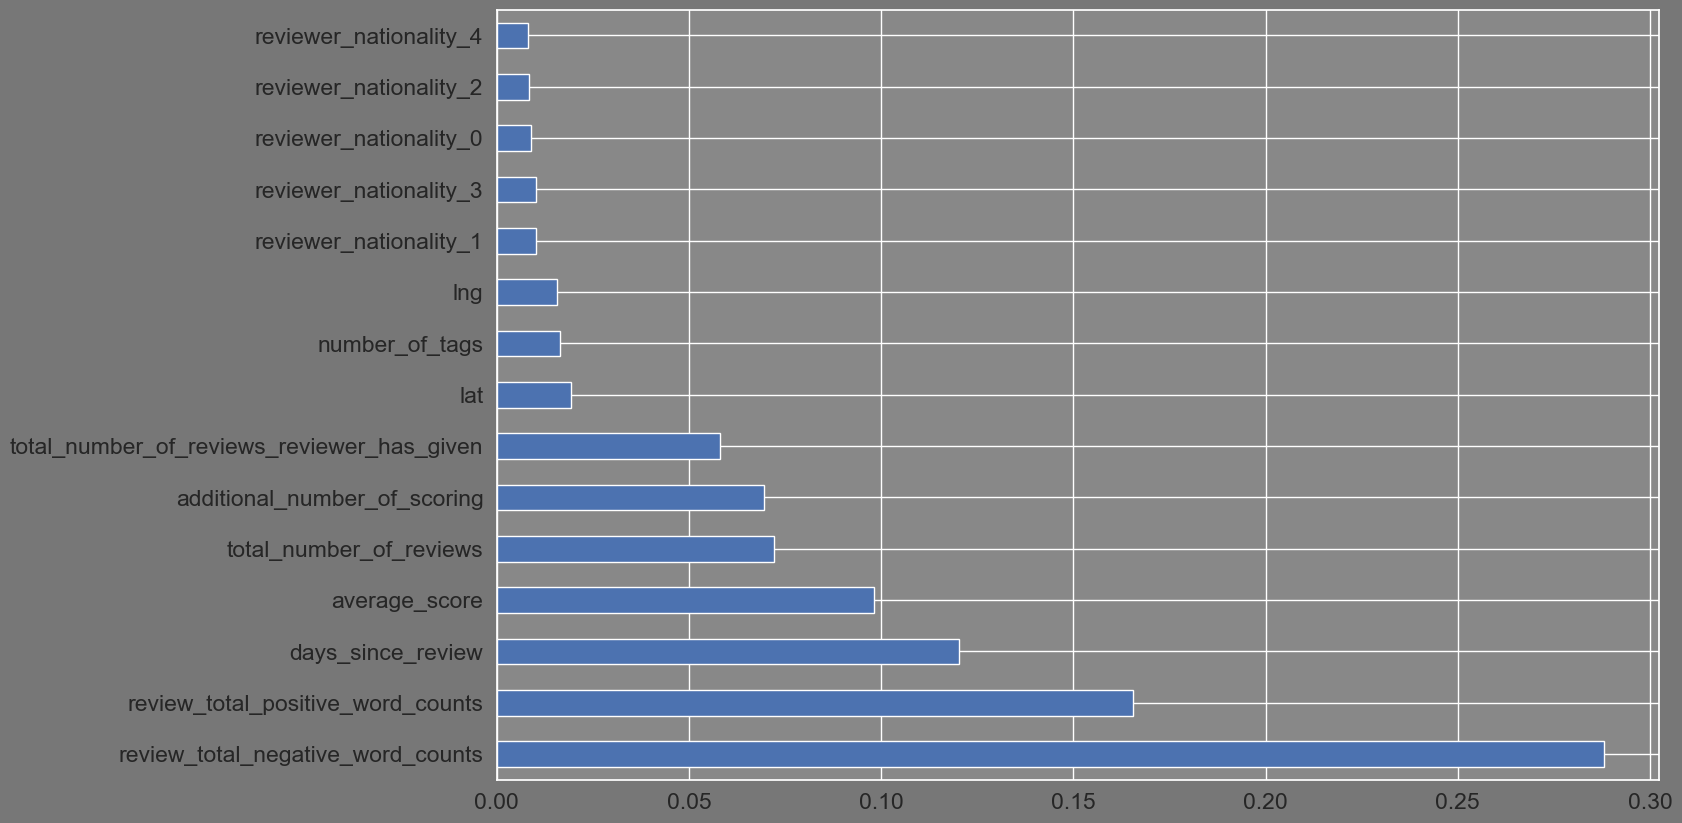

In [34]:
#can look up which features mattered more
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

Overall, not great values of prediction accuracy, but even for a "black box" model there can be experimentation with sorting out relevant features and getting info from "dirty" columns